In [1]:
import pandas as pd

df = pd.read_csv(r"C:\Users\jk977\OneDrive\Desktop\nlp dataset\nlp_reviews_500.csv")

df.head()

,review_text,sentiment
0,Excellent results after using this for a few w...,positive
1,"Amazing product, I will buy it again",positive
2,The product is very good and works perfectly f...,positive
3,Excellent results after using this for a few w...,positive
4,Totally happy with this purchase,positive


In [2]:
review = df["review_text"]

review

0      Excellent results after using this for a few w...
1                   Amazing product, I will buy it again
2      The product is very good and works perfectly f...
3      Excellent results after using this for a few w...
4                       Totally happy with this purchase
                             ...                        
535                             Does the job as expected
536                              Average quality product
537                                   Neutral experience
538                                   Neutral experience
539                                   Not bad, not great
Name: review_text, Length: 540, dtype: object

In [3]:
from nltk import word_tokenize
import string
from nltk.corpus import stopwords

all_word = []

for i in review:
    word = word_tokenize(i)
    word = [w.lower() for w in word]
    word = [w for w in word if w not in string.punctuation]
    all_word.append(word)

print(all_word)

[['excellent', 'results', 'after', 'using', 'this', 'for', 'a', 'few', 'weeks'], ['amazing', 'product', 'i', 'will', 'buy', 'it', 'again'], ['the', 'product', 'is', 'very', 'good', 'and', 'works', 'perfectly', 'for', 'my', 'skin'], ['excellent', 'results', 'after', 'using', 'this', 'for', 'a', 'few', 'weeks'], ['totally', 'happy', 'with', 'this', 'purchase'], ['excellent', 'results', 'after', 'using', 'this', 'for', 'a', 'few', 'weeks'], ['totally', 'happy', 'with', 'this', 'purchase'], ['the', 'product', 'is', 'very', 'good', 'and', 'works', 'perfectly', 'for', 'my', 'skin'], ['the', 'product', 'is', 'very', 'good', 'and', 'works', 'perfectly', 'for', 'my', 'skin'], ['this', 'product', 'exceeded', 'my', 'expectations'], ['totally', 'happy', 'with', 'this', 'purchase'], ['totally', 'happy', 'with', 'this', 'purchase'], ['amazing', 'product', 'i', 'will', 'buy', 'it', 'again'], ['amazing', 'product', 'i', 'will', 'buy', 'it', 'again'], ['totally', 'happy', 'with', 'this', 'purchase'], [

In [4]:
stopword = set(stopwords.words('english'))

clean = [[w for w in clean if w not in stopword] for clean in all_word]

print(clean)

[['excellent', 'results', 'using', 'weeks'], ['amazing', 'product', 'buy'], ['product', 'good', 'works', 'perfectly', 'skin'], ['excellent', 'results', 'using', 'weeks'], ['totally', 'happy', 'purchase'], ['excellent', 'results', 'using', 'weeks'], ['totally', 'happy', 'purchase'], ['product', 'good', 'works', 'perfectly', 'skin'], ['product', 'good', 'works', 'perfectly', 'skin'], ['product', 'exceeded', 'expectations'], ['totally', 'happy', 'purchase'], ['totally', 'happy', 'purchase'], ['amazing', 'product', 'buy'], ['amazing', 'product', 'buy'], ['totally', 'happy', 'purchase'], ['amazing', 'product', 'buy'], ['comfortable', 'easy', 'use'], ['extremely', 'satisfied', 'quality', 'product'], ['totally', 'happy', 'purchase'], ['amazing', 'product', 'buy'], ['highly', 'recommended', 'worth', 'money'], ['highly', 'recommended', 'worth', 'money'], ['great', 'value', 'price'], ['extremely', 'satisfied', 'quality', 'product'], ['totally', 'happy', 'purchase'], ['comfortable', 'easy', 'use'

In [5]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

lem = [[wnl.lemmatize(w) for w in text] for text in clean]

print(lem)

[['excellent', 'result', 'using', 'week'], ['amazing', 'product', 'buy'], ['product', 'good', 'work', 'perfectly', 'skin'], ['excellent', 'result', 'using', 'week'], ['totally', 'happy', 'purchase'], ['excellent', 'result', 'using', 'week'], ['totally', 'happy', 'purchase'], ['product', 'good', 'work', 'perfectly', 'skin'], ['product', 'good', 'work', 'perfectly', 'skin'], ['product', 'exceeded', 'expectation'], ['totally', 'happy', 'purchase'], ['totally', 'happy', 'purchase'], ['amazing', 'product', 'buy'], ['amazing', 'product', 'buy'], ['totally', 'happy', 'purchase'], ['amazing', 'product', 'buy'], ['comfortable', 'easy', 'use'], ['extremely', 'satisfied', 'quality', 'product'], ['totally', 'happy', 'purchase'], ['amazing', 'product', 'buy'], ['highly', 'recommended', 'worth', 'money'], ['highly', 'recommended', 'worth', 'money'], ['great', 'value', 'price'], ['extremely', 'satisfied', 'quality', 'product'], ['totally', 'happy', 'purchase'], ['comfortable', 'easy', 'use'], ['comfo

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

join1 = [' '.join(w) for w in lem]

matrix = tfidf.fit_transform(join1)

print(matrix.toarray())

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.67190397 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.43425909 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.63774562 ... 0.         0.         0.        ]]


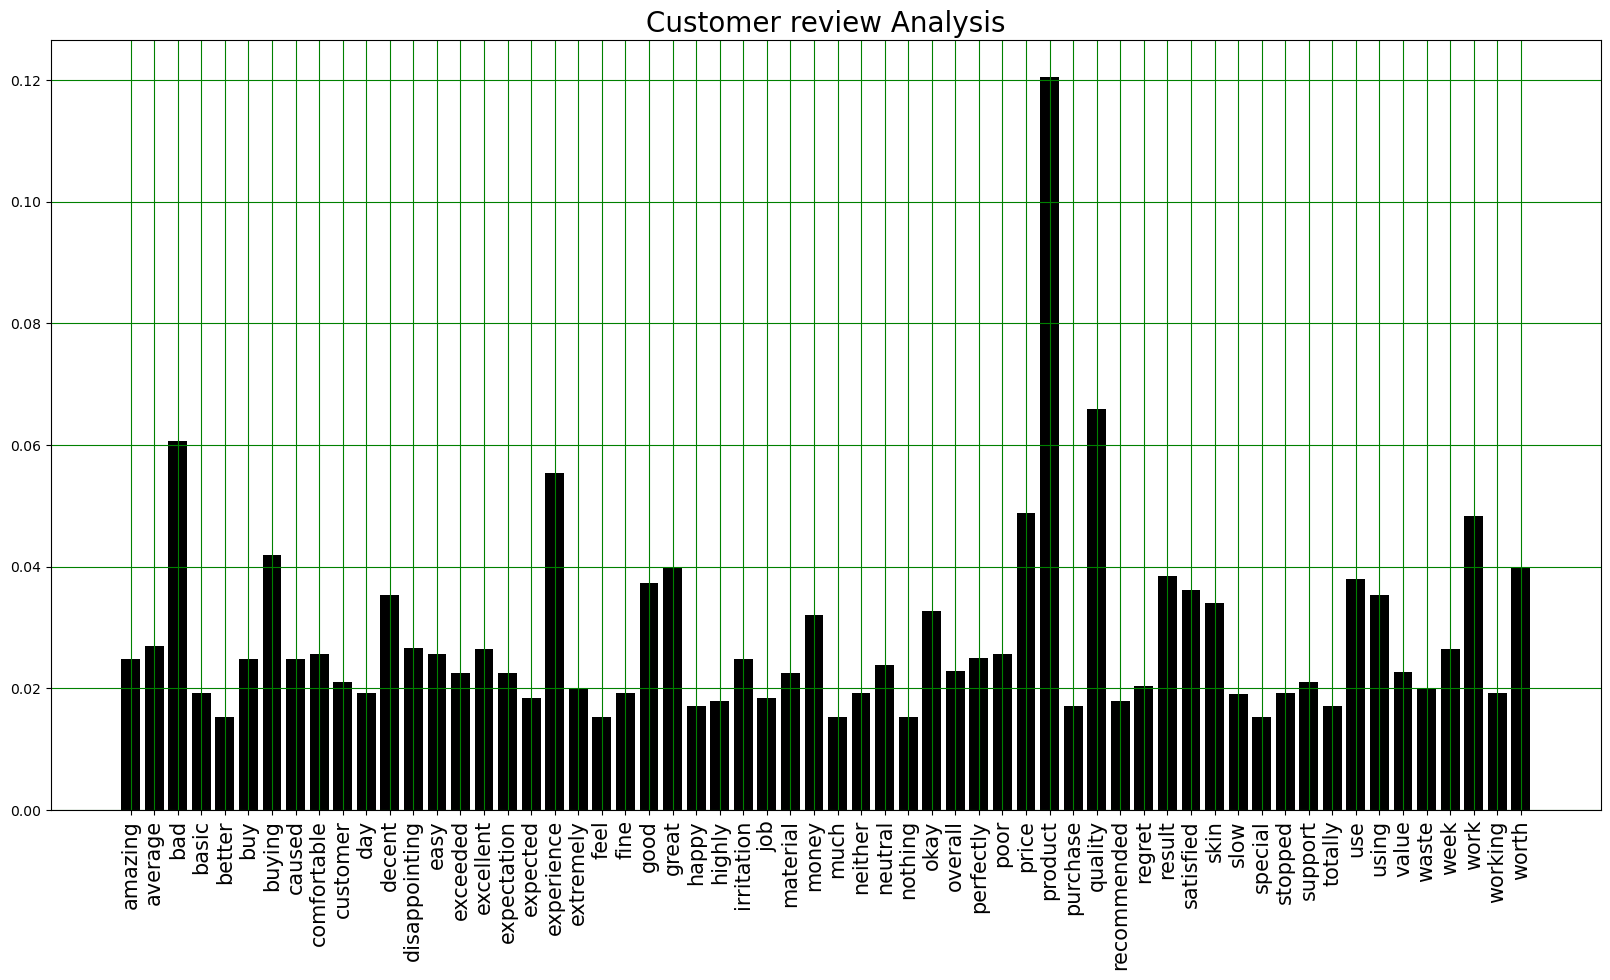

In [16]:
word = tfidf.get_feature_names_out()
score = matrix.toarray().mean(axis = 0)

import matplotlib.pyplot as plt

plt.figure(figsize = (20,10))
plt.bar(word,score, color = "black")
plt.grid("--", color = "green")
plt.title("Customer review Analysis", size = 20)
plt.xticks(rotation = 90, size = 15)
plt.show()